In [113]:
# Step 1: Import libraries 
# Step 2: Load the dataset
# Step 3: Check for missing values and info
# Step 3.5: Handle missing values (NaN)
# Ensure numeric columns are numeric before filling NaN
# Fill missing numeric values with the column mean
# Step 4: Clean column names (remove leading/trailing spaces)
# Step 5: Fix date formats (turn inconsistent texts into real date format) 
# Step 6: Standardize text columns (make names consistent and neat)
# Step 6.5: Standardize Category (Electronics, Gadgets)
# Step 7: Convert Units Sold to numeric 
# Step 8: Clean currency columns (Unit Price, Total Sales)
# Step 9: Fix Profit Margin (%)
# Step 10: Drop rows with missing key data (clean final dataset)
# Step 11: Check cleaned results
# Step 12: Total Sales by Region 
# Step 13: Sales Trend Over Time 
# Step 14: Category Share Pie Chart  

Step 1: Import libraries 

In [93]:
import warnings 
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Step 2: Load the dataset

In [94]:
df = pd.read_csv("messy_sales.csv")
df.head(20)

,Date,Region,Product,Category,Units Sold,Unit Price,Total Sales,Profit Margin (%)
0,January 15 2024,north,tablet,electronics,32,USD 858,########,10%
1,1/30/2024,north,Tablet,Electronics,72,$833.83,########,15 percent
2,2/13/2024,EAST,laptop,ELEC,NaN,489.12,NaN,0.08
3,4/28/2024,West,Laptop,gadget,thirty,$733.46,########,0.1
4,2/18/2024,EAST,Phone,ELEC,47,USD 373,"40,920",0.1
5,April 03 2024,South,laptop,Gadgets,twenty,670.28,3103,8 percent
6,1/28/2024,north,tablet,electronics,thirty,758.58,"37,789",8 percent
7,March 15 2024,West,Tablet,Gadgets,47,$241.65,"11,484",12%
8,January 09 2024,West,Phone,gadget,thirty,USD 796,"18,486",8 percent
9,2/7/2024,West,laptop,Gadgets,thirty,$996.92,"20,558",0.08


Step 3: Check for missing values and info


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               200 non-null    object
 1   Region             200 non-null    object
 2   Product            200 non-null    object
 3   Category           200 non-null    object
 4   Units Sold         196 non-null    object
 5   Unit Price         200 non-null    object
 6   Total Sales        197 non-null    object
 7   Profit Margin (%)  200 non-null    object
dtypes: object(8)
memory usage: 12.6+ KB


Step 4: Clean column names (remove leading/trailing spaces)

In [96]:
df.isnull().sum()

Date                 0
Region               0
Product              0
Category             0
Units Sold           4
Unit Price           0
Total Sales          3
Profit Margin (%)    0
dtype: int64

Ensure numeric columns are numeric before filling NaN

In [97]:
df["Units Sold"] = pd.to_numeric(df["Units Sold"], errors="coerce")
df["Total Sales"] = pd.to_numeric(df["Total Sales"], errors="coerce")

Fill missing numeric values with the column mean

In [98]:
df["Units Sold"] = df["Units Sold"].fillna(df["Units Sold"].mean())
df["Total Sales"] = df["Total Sales"].fillna(df["Total Sales"].mean())

Step 4: Clean column names (remove leading/trailing spaces)

In [99]:
df.columns = df.columns.str.strip()

Step 5: Fix date formats (turn inconsistent texts into real date format) 

In [100]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

Step 6: Standardize text columns (make names consistent and neat)

In [101]:
for col in ["Region", "Product", "Category"]: 
    df[col] = df[col].str.strip().str.title()

In [102]:
df.head()

,Date,Region,Product,Category,Units Sold,Unit Price,Total Sales,Profit Margin (%)
0,2024-01-15,North,Tablet,Electronics,32.000000,USD 858,26096.323077,10%
1,NaT,North,Tablet,Electronics,72.000000,$833.83,26096.323077,15 percent
2,NaT,East,Laptop,Elec,52.307692,489.12,26096.323077,0.08
3,NaT,West,Laptop,Gadget,52.307692,$733.46,26096.323077,0.1
4,NaT,East,Phone,Elec,47.000000,USD 373,26096.323077,0.1


Step 6.5: Standardize Category (Electronics, Gadgets)

In [103]:
category_map = {
    "Elec": "Electronics",
    "Gadget": "Gadgets"
}

df["Category"] = df["Category"].replace(category_map)

Step 7: Convert Units Sold to numeric 

In [104]:
df["Units Sold"] = pd.to_numeric(df["Units Sold"], errors="coerce")

Step 8: Clean currency columns (Unit Price, Total Sales)

In [105]:
for col in ["Unit Price", "Total Sales"]:
    df[col] = df[col].astype(str) 
    df[col] = (
    df[col] 
    .str.replace("[$, USD]", "", regex=True)
    .str.strip()
    )
    df[col] = pd.to_numeric(df[col], errors="coerce")

Step 9: Fix Profit Margin (%)

In [106]:
df["Profit Margin (%)"] = (
    df["Profit Margin (%)"] 
    .astype(str)
    .str.replace("%", "", regex=True)
    .str.replace("percent", "", regex=True)
    .astype(float)
)
df["Profit Margin (%)"] = np.where(
    df["Profit Margin (%)"] < 1, 
    df["Profit Margin (%)"] * 100, 
    df["Profit Margin (%)"] )

Step 10: Drop rows with missing key data (clean final dataset)

In [107]:
df_cleaned = df.dropna(subset=["Date", "Region", "Total Sales"])

Step 11: Check cleaned results


In [108]:
df_cleaned.head()

,Date,Region,Product,Category,Units Sold,Unit Price,Total Sales,Profit Margin (%)
0,2024-01-15,North,Tablet,Electronics,32.000000,858.00,26096.323077,10.0
5,2024-04-03,South,Laptop,Gadgets,52.307692,670.28,3103.000000,8.0
7,2024-03-15,West,Tablet,Gadgets,47.000000,241.65,26096.323077,12.0
8,2024-01-09,West,Phone,Gadgets,52.307692,796.00,26096.323077,8.0
10,2024-01-26,South,Desktop,Electronics,52.307692,100.76,26096.323077,8.0


Step 12: Total Sales by Region 


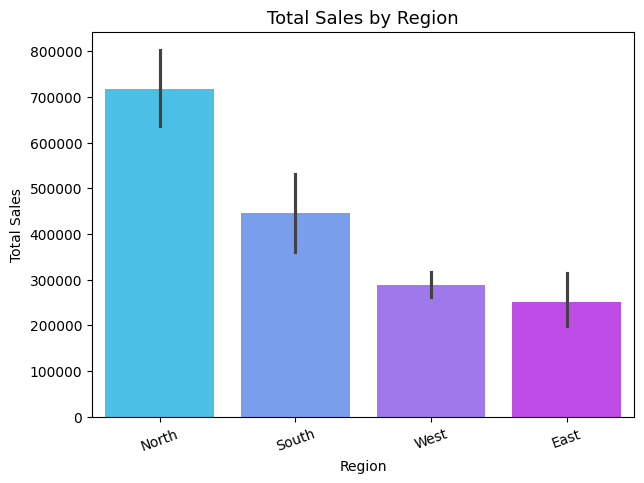

In [109]:
plt.figure(figsize=(7,5))
sns.barplot(data=df_cleaned, x="Region", y="Total Sales", estimator=sum, palette="cool")
plt.title("Total Sales by Region", fontsize=13)
plt.xticks(rotation=20)
plt.show()

Step 13: Sales Trend Over Time 


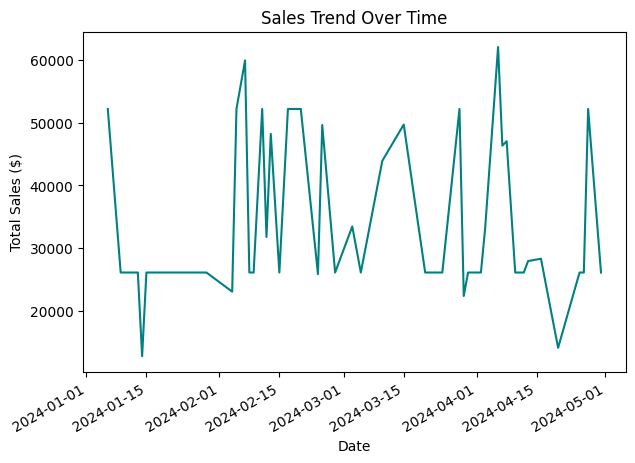

In [110]:
plt.figure(figsize=(7,5))
df_cleaned.groupby("Date")["Total Sales"].sum().plot(kind="line", color="teal")
plt.title("Sales Trend Over Time")
plt.ylabel("Total Sales ($)")
plt.show()

Step 14: Category Share Pie Chart  


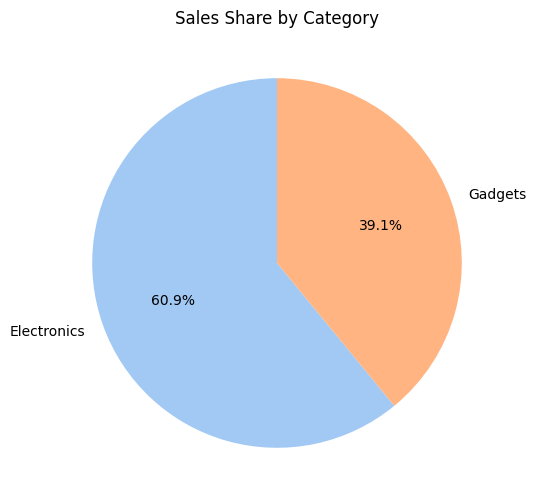

In [111]:
plt.figure(figsize=(6,6))
category_sales = df_cleaned.groupby("Category")["Total Sales"].sum()
category_sales.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel"))
plt.title("Sales Share by Category")
plt.ylabel("")
plt.show()
